## Conversion of contact times in Flaugergues records to heliographic coordinates

This notebook shows the pipeline how to process original contact times records to the corresponding heliographic coordinates.

Required imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation

import warnings
warnings.filterwarnings("ignore") #ignore AstroPy warnings, not necessary

from utils import rectime2utctime, get_solar_coords, make_disk

Read records into pandas.DataFrame. Here we read records made with cross-hair wires (horizontal and vertical):

In [2]:
df = pd.read_csv('../records/records_hv.csv')
df.head()

,obs_id,recorded_time,modified_time,object,event,rising,sidereal,pole
0,20,1796-07-05 09:19:28.000,1796-07-05 09:19:14.000,S,h,True,False,NaN
1,20,1796-07-05 09:19:14.000,1796-07-05 09:19:28.000,S,v,True,False,NaN
2,20,1796-07-05 09:20:39.000,1796-07-05 09:21:39.000,t_B,h,True,False,NaN
3,20,1796-07-05 09:21:08.000,1796-07-05 09:22:08.000,t_B,v,True,False,NaN
4,20,1796-07-05 09:22:50.000,1796-07-05 09:22:30.000,S,h,True,False,NaN


Note the column ```modified_time```. It contains a modified contact time that corrects errors where we assume miswritings. Below we replace ```recorded_time``` with ```modified_time``` where necessary:

In [3]:
mask = ~df.modified_time.isna()
df.loc[mask, 'recorded_time'] = df.loc[mask, 'modified_time']
df.recorded_time = pd.to_datetime(df.recorded_time)
df.head()

,obs_id,recorded_time,modified_time,object,event,rising,sidereal,pole
0,20,1796-07-05 09:19:14,1796-07-05 09:19:14.000,S,h,True,False,NaN
1,20,1796-07-05 09:19:28,1796-07-05 09:19:28.000,S,v,True,False,NaN
2,20,1796-07-05 09:21:39,1796-07-05 09:21:39.000,t_B,h,True,False,NaN
3,20,1796-07-05 09:22:08,1796-07-05 09:22:08.000,t_B,v,True,False,NaN
4,20,1796-07-05 09:22:30,1796-07-05 09:22:30.000,S,h,True,False,NaN


Next step is to set the position of the observer:

In [4]:
obs_loc = EarthLocation.from_geodetic(4.68721, 44.48515)

Now we can map the recorded time to the UTC time.

In [5]:
df = rectime2utctime(df, obs_loc)
df.head()

,obs_id,recorded_time,modified_time,object,event,rising,sidereal,pole,utc_time
0,20,1796-07-05 09:19:14,1796-07-05 09:19:14.000,S,h,True,False,NaN,1796-07-05 09:04:41.714171
1,20,1796-07-05 09:19:28,1796-07-05 09:19:28.000,S,v,True,False,NaN,1796-07-05 09:04:55.714171
2,20,1796-07-05 09:21:39,1796-07-05 09:21:39.000,t_B,h,True,False,NaN,1796-07-05 09:07:06.714171
3,20,1796-07-05 09:22:08,1796-07-05 09:22:08.000,t_B,v,True,False,NaN,1796-07-05 09:07:35.714171
4,20,1796-07-05 09:22:30,1796-07-05 09:22:30.000,S,h,True,False,NaN,1796-07-05 09:07:57.714171


Let's take one record, for example, the one with obs_id=85. Note there are two spots (t_H and t_I) in this record:

In [6]:
rec = df.loc[df.obs_id == 85]
rec

,obs_id,recorded_time,modified_time,object,event,rising,sidereal,pole,utc_time
394,85,1796-07-30 07:56:22,NaN,S,v,True,False,NaN,1796-07-30 07:43:34.790250
395,85,1796-07-30 07:57:00,NaN,S,h,True,False,NaN,1796-07-30 07:44:12.790250
396,85,1796-07-30 07:57:32,NaN,t_H,v,True,False,NaN,1796-07-30 07:44:44.790250
397,85,1796-07-30 07:57:57,NaN,t_H,h,True,False,NaN,1796-07-30 07:45:09.790250
398,85,1796-07-30 07:58:01,NaN,t_I,v,True,False,NaN,1796-07-30 07:45:13.790250
399,85,1796-07-30 07:58:37,NaN,t_I,h,True,False,NaN,1796-07-30 07:45:49.790250
400,85,1796-07-30 07:59:48,NaN,S,h,True,False,NaN,1796-07-30 07:47:00.790250
401,85,1796-07-30 08:00:07,NaN,S,v,True,False,NaN,1796-07-30 07:47:19.790250


Use ```get_solar_coords``` to calculate the heliographic coordinates. Note the parameter `method` that should be
* 'hv' for horizontal and vertical wires;
* 'ob' for oblique wires;
* 'rh' for rhomboid wires.

In our example, we process observations made with horizontal and vertical wires, thus `method='hv'`:

In [7]:
res = get_solar_coords(rec, obs_loc, method='hv')
res

[{'name': 't_H',
  'x': 0.48357473381283944,
  'y': -0.11039860837514984,
  'incl_obs': -53.252529047136086,
  'r_sun': 67.30753865452684,
  'complemented': False,
  'lat': -6.178773651381935,
  'long': 33.90111593868757,
  'cmd': 27.222705616072474,
  'x_hgc': 0.45479298396792367,
  'y_hgc': -0.10763104552200671,
  'l0': 6.678410322615093,
  'b0': 5.9027998647679425,
  'p': 10.664255838685756,
  'incl': -48.28106364516792,
  'incl_diff': 0.10027364596159316,
  'obs_id': 85,
  'utc_time': Timestamp('1796-07-30 07:43:34.790250'),
  'recorded_time': Timestamp('1796-07-30 07:56:22'),
  'sidereal': False,
  'rising': True,
  'type': 'hv',
  'modified': False},
 {'name': 't_I',
  'x': -0.05221294551862493,
  'y': -0.1887460078671916,
  'incl_obs': -53.252529047136086,
  'r_sun': 67.30753865452684,
  'complemented': False,
  'lat': -4.246168376426235,
  'long': 1.7174677582721642,
  'cmd': -4.960942564342929,
  'x_hgc': -0.08623926934282217,
  'y_hgc': -0.07404179947502702,
  'l0': 6.6784103

We obtain a dictionary (one for each sunspot) with keywords and values, which you can also find in the file [../coordinates.csv](../coordinates.csv). The auxiliary keywords `x_hgc` and `y_hgc` can be used to plot the sunspots on the solar disk:

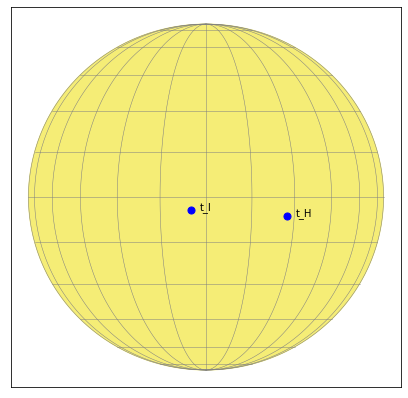

In [8]:
ax = make_disk()
for spot in res:
    ax.scatter(spot['x_hgc'], spot['y_hgc'], color='b', s=50)
    ax.text(spot['x_hgc'] + 0.05, spot['y_hgc'], spot['name'])
plt.show()

In the same way one can process the files [../records/records_ob.csv](../records/records_ob.csv) and [../records/records_rh.csv](../records/records_rh.csv). 

Done!